In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

test = pd.read_csv("../input/asteroids-threat-prediction/Test_.csv")
train = pd.read_csv("../input/asteroids-threat-prediction/Train_.csv")

train.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,26.6,0.012722,0.028447,12.721988,28.447230,0.007905,0.017676,41.738807,93.330809,7.648194,...,7.583001,347.475804,443.098049,0.890218,245.671594,1.384692,2.457846e+06,125.647826,0.812461,0
1,22.7,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,19.142824,...,4.710039,176.203926,1107.448956,0.984464,175.628191,3.205210,2.457653e+06,113.100725,0.325071,0
2,24.0,0.042126,0.094198,42.126461,94.197631,0.026176,0.058532,138.210178,309.047354,7.819970,...,11.609153,146.961250,317.222445,0.828952,195.589585,0.991616,2.458100e+06,246.773198,1.134850,0
3,17.7,0.766576,1.714115,766.575574,1714.115092,0.476328,1.065101,2515.011805,5623.737359,2.335267,...,7.012588,354.475923,1036.204307,1.259659,105.208870,2.748343,2.457681e+06,111.130550,0.347422,0
4,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,30.994787,...,60.900589,219.323712,2174.260704,1.277179,218.504766,5.291914,2.458459e+06,284.064157,0.165574,0


In [2]:
# to obtain the number of missing values in each column
train.isnull().sum()

Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbit ID                        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longitude              0
Orbital Period                  0
Perihelion Distance             0
Perihelion Arg                  0
Aphelion Dist                   0
Perihelion Tim

In [3]:
# to list out the column name and number
feature = train.columns
feature = feature.drop("Hazardous")
for i, feat in enumerate(feature,1):
    print(str(i) + ": " + str(feat) + "\n")

1: Absolute Magnitude

2: Est Dia in KM(min)

3: Est Dia in KM(max)

4: Est Dia in M(min)

5: Est Dia in M(max)

6: Est Dia in Miles(min)

7: Est Dia in Miles(max)

8: Est Dia in Feet(min)

9: Est Dia in Feet(max)

10: Relative Velocity km per sec

11: Relative Velocity km per hr

12: Miles per hour

13: Miss Dist.(Astronomical)

14: Miss Dist.(lunar)

15: Miss Dist.(kilometers)

16: Miss Dist.(miles)

17: Orbit ID

18: Orbit Uncertainity

19: Minimum Orbit Intersection

20: Jupiter Tisserand Invariant

21: Epoch Osculation

22: Eccentricity

23: Semi Major Axis

24: Inclination

25: Asc Node Longitude

26: Orbital Period

27: Perihelion Distance

28: Perihelion Arg

29: Aphelion Dist

30: Perihelion Time

31: Mean Anomaly

32: Mean Motion



<AxesSubplot:>

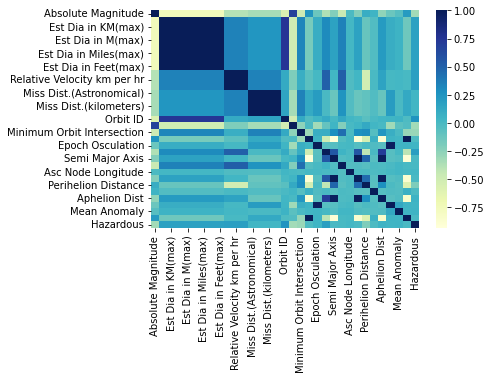

In [4]:
sns.heatmap(train.corr(), annot = False, cmap = "YlGnBu")

<AxesSubplot:xlabel='Est Dia in KM(min)', ylabel='Est Dia in KM(max)'>

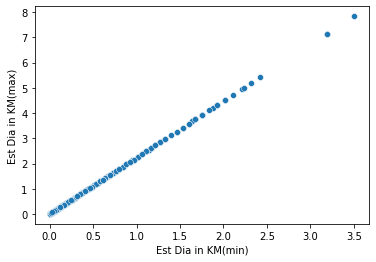

In [5]:
sns.scatterplot(x = train["Est Dia in KM(min)"], y = train["Est Dia in KM(max)"])

In [6]:
# check on the mutual information between features
from sklearn.feature_selection import mutual_info_classif
x = train.copy()
y = x.pop("Hazardous")

discrete_features = x.dtypes == int

def mi(x,y,discrete_features):
    mi_score = mutual_info_classif(x,y,discrete_features=discrete_features)
    mi_score = pd.Series(mi_score, name = "Mutual Information", index = x.columns)
    mi_score = mi_score.sort_values(ascending = False)
    return mi_score

mi_score = mi(x,y,discrete_features)

<AxesSubplot:xlabel='Mutual Information'>

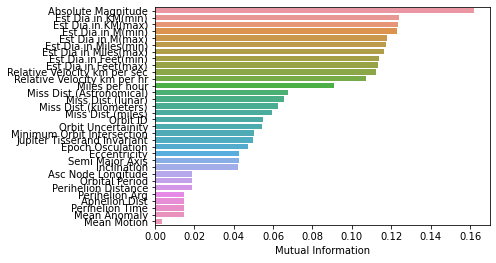

In [7]:
# visualize mutual information
sns.barplot(y=feature,x=mi_score)